[[1. 1. 1. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
[[0.01041233 0.01041233 0.01041233 ... 0.01041233 0.01041233 0.01041233]
 [0.01041233 0.01041233 0.01041233 ... 0.01041233 0.01041233 0.01041233]
 [0.01041233 0.01041233 0.01041233 ... 0.01041233 0.01041233 0.01041233]
 ...
 [0.01041233 0.01041233 0.01041233 ... 0.01041233 0.01041233 0.01041233]
 [0.01041233 0.01041233 0.01041233 ... 0.01041233 0.01041233 0.01041233]
 [0.01041233 0.01041233 0.01041233 ... 0.01041233 0.01041233 0.01041233]]
[0.01041233 0.01041233 0.01041233 0.01041233 0.01041233 0.01041233
 0.01041233 0.01041233 0.01041233 0.01041233 0.01041233 0.01041233
 0.01041233 0.01041233 0.01041233 0.01041233 0.01041233 0.01041233
 0.01041233 0.0

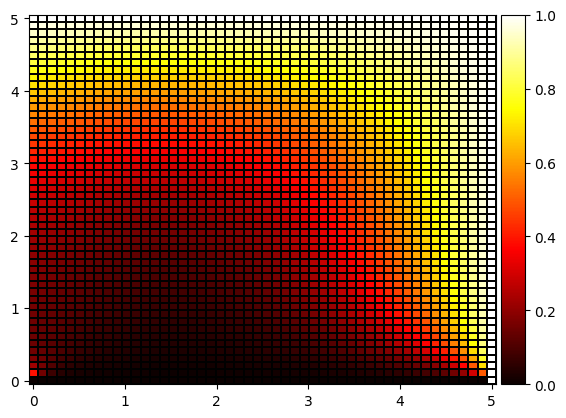

In [7]:
#%matplotlib notebook
import sympy as sy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm
import numpy as np
from Domain import Mesh
from Domain import PDE_2D_Solver
from Differentials import TDMA


x, y = sy.symbols('x y')

Ux = 1
qs = 1

N = 20
# Define the potensial function
phi = Ux*x + qs/(2*np.pi)*sy.log(x**2 + y**2)  #Potensial should be found by gridding. 

# Define the velocity components
u = sy.diff(phi, x)
v = sy.diff(phi, y)

u_fun = sy.lambdify([x,y], u)
v_fun = sy.lambdify([x,y], v)

# Mesh Properties 
x_list = np.linspace(-1, 1, N)
y_list = np.linspace(-1, 1, N)

X, Y = np.meshgrid(x_list, y_list)

u_num = u_fun(X,Y)
v_num = v_fun(X,Y)

z = X * np.exp(-X/2 - Y**2)
dx, dy = np.gradient(z)
n = -2
color = np.sqrt(((dx-n)/2)*2 + ((dy-n)/2)*2)

# print(phi)
# print(u)
# print(u_fun)
# print(u_fun(x_list,y_list))
# print(X)

# plt.figure(1)
# plt.quiver(X, Y, u_num, v_num, color)
# plt.streamplot(X, Y, u_num, v_num, density=[1, 0.4])
# plt.streamplot(X, Y, u_num, v_num, color=v_num, linewidth=2, cmap='autumn')
# plt.show()

# fig, mesh_ax = plt.subplots()

# plt.

# mesh_ax.pcolormesh(X,Y,np.zeros((N,N)),vmin=-0.5, vmax=1.0, edgecolors="black")

# plt.show()


block_coordinates = [(0,0),(0,5),(5,5),(5,0)]
# print(list(block_coordinates[3]))
node_numbers = [50, 50]



space = Mesh(block_coordinates, node_numbers) #it seems like a one block. Build more sopisticated block type structures
# space.nonuniform_block_mesh_2D(-1.2, -1.4)
# space.nonuniform_mesh_2D(-1.2, -1.4)
space.nonuniform_block_mesh_2D()

# print(space.matricies[0])
# print(space.matricies[1])

BCs = {'W': 'N', 'S': 'D', 'E': 'N', 'N': 'D'}
BCs_values = {'W': 1, 'S': 0, 'E': 1, 'N': 1}

solution = PDE_2D_Solver(space,BCs)
solution.solver(BCs_values)
print(type(solution))
solution.velocityfield()


fig, ax = plt.subplots()
# # ax = fig1.add_subplot(111, projection='3d')
z = np.zeros((node_numbers[1],node_numbers[0]))
x_MAT = space.matricies[0]
y_MAT = space.matricies[1]
# # ax.plot_surface(x_MAT,y_MAT,z,vmin=-0.5, vmax=1.0, edgecolors="black")
# plt.plot(x_MAT,y_MAT,z,vmin=-0.5, vmax=1.0, edgecolors="black")
image = ax.pcolormesh(x_MAT,np.flip(y_MAT),solution.solution, vmin=0, vmax=1, edgecolors="black", cmap='hot', linewidth=0.1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(image, cax=cax)
plt.show()

# print(solution.solution)

# W = np.array([0, -4, -4],dtype='float')
# C = np.array([10, 10, 10],dtype='float')
# E = np.array([-4, -4, 0],dtype='float')
# Q = np.array([275, 75, 475],dtype='float')
 
# print(TDMA(W,C,E,Q))

# x_MAT = np.array([[1,2,3,4,5],[11,21,31,41,51],[51,52,53,54,55]])
# x_MAT = x_MAT.T
# print(x_MAT)
# print(x_MAT[-2:0:-1,1])


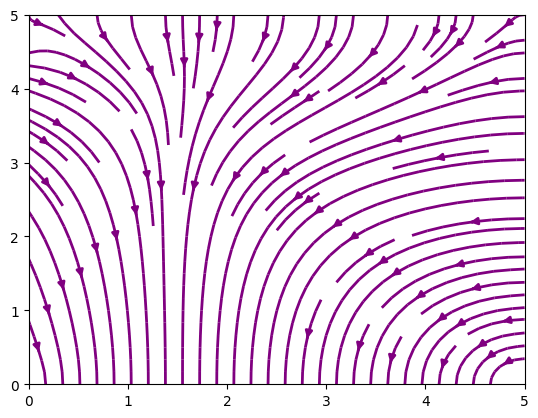

In [8]:
plt.figure(2)
# plt.quiver(X, Y, u_num, v_num, color)
# plt.streamplot(X, Y, u_num, v_num, density=[1, 0.4])

# print(solution.velocity[:,:,0])

plt.streamplot(x_MAT, y_MAT, -solution.velocity[:,:,0], solution.velocity[:,:,1], color="purple" ,linewidth=2, cmap='autumn')
plt.show()